# Исследование объявлений о продаже квартир
### Проведем иследование данных о квартирах предоставленных сайтом Циан 

In [2]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Загружаем данные 
data = pd.read_csv('C:/Users/admin/all/offers_ALL 1.csv', sep=';')

display(data.head())


,ID,Количество комнат,Тип,район,Адрес,"Площадь, м2",Этаж,Цена,Ремонт,Ссылка на объявление
0,300151528,2.0,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",34.8,4/12,5220000,NaN,https://www.cian.ru/sale/flat/300151528
1,297027698,2.0,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Помяловского...",48.0,5/5,4450000,Косметический,https://www.cian.ru/sale/flat/297027698
2,300140904,2.0,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Сергеева, 5/8",58.7,2/4,5700000,Евроремонт,https://www.cian.ru/sale/flat/300140904
3,295915593,1.0,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Багратиона, ...",43.0,7/9,5990000,Косметический,https://www.cian.ru/sale/flat/295915593
4,295895678,3.0,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",66.1,12/12,7204900,NaN,https://www.cian.ru/sale/flat/295895678


In [3]:
# переименование столбцов для удобного использования 
data = data.rename(columns={'Количество комнат': 'rooms', 
                               'Тип': 'type', 
                               'район': 'district', 
                               'Адрес': 'address', 
                               'Площадь, м2': 'area',
                               'Этаж': 'floor', 
                               'Цена': 'price', 
                               'Ремонт': 'repair', 
                               'Ссылка на объявление': 'link'})
# смотрим основную информацию о датафрейме
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        767 non-null    int64  
 1   rooms     746 non-null    float64
 2   type      767 non-null    object 
 3   district  767 non-null    object 
 4   address   767 non-null    object 
 5   area      767 non-null    float64
 6   floor     767 non-null    object 
 7   price     767 non-null    int64  
 8   repair    86 non-null     object 
 9   link      767 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 60.0+ KB


None

### Перед работой с данными необходимо произвести следующие изменения и анализ данных:
#### 1. Разделим столбец "floor" - возьмем из него информацию за знаком "/" и добавим столбец с данными о количестве этажей


#### 2. Изменим типы объектов в следующих столбцах:
*rooms* - изменить на тип объекта int\
*floor* - изменить на int 

#### 3. Определим количество пропущенных значениях в столбцах

#### 4. Заменим пропуски в столбцах

In [4]:
# добавим столбец 'floor_all'
data['floor_all'] = data['floor'].str.split('/').str.get(1)
data['floor'] = data['floor'].str.split('/').str.get(0)
data.sample(5) 

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all
525,287276535,1.0,Продажа квартиры в новостройке,Октябрьский,"Иркутская область, Иркутск, ИВАТУ городок, Ави...",34.90,3,5585250,NaN,https://www.cian.ru/sale/flat/287276535,9
745,283702829,2.0,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Гравийная улица, 22/7",47.15,10,5370000,NaN,https://www.cian.ru/sale/flat/283702829,13
652,299046888,1.0,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Ново-Ленино мкр, П...",37.10,1,4359250,NaN,https://www.cian.ru/sale/flat/299046888,13
662,299639159,1.0,Продажа квартиры,Ленинский,"Иркутская область, Иркутск, улица Баумана, 271/1",36.00,6,4500000,NaN,https://www.cian.ru/sale/flat/299639159,18
314,299629892,1.0,Продажа квартиры в новостройке,Правобережный,"Иркутская область, Иркутск, улица Петрова, 16",36.73,14,5850617,NaN,https://www.cian.ru/sale/flat/299629892,16


In [5]:
# изменим тип данных для дальнейшего исследовани
data['rooms'] = data['rooms'].fillna(0).astype('int')
# data['area'] = data['area'].fillna(0).astype('int')
data['floor'] = data['floor'].fillna(0).astype('int')

In [6]:
display(data.head())
display(data.info())

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all
0,300151528,2,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",34.8,4,5220000,NaN,https://www.cian.ru/sale/flat/300151528,12
1,297027698,2,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Помяловского...",48.0,5,4450000,Косметический,https://www.cian.ru/sale/flat/297027698,5
2,300140904,2,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Сергеева, 5/8",58.7,2,5700000,Евроремонт,https://www.cian.ru/sale/flat/300140904,4
3,295915593,1,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Багратиона, ...",43.0,7,5990000,Косметический,https://www.cian.ru/sale/flat/295915593,9
4,295895678,3,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",66.1,12,7204900,NaN,https://www.cian.ru/sale/flat/295895678,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         767 non-null    int64  
 1   rooms      767 non-null    int32  
 2   type       767 non-null    object 
 3   district   767 non-null    object 
 4   address    767 non-null    object 
 5   area       767 non-null    float64
 6   floor      767 non-null    int32  
 7   price      767 non-null    int64  
 8   repair     86 non-null     object 
 9   link       767 non-null    object 
 10  floor_all  767 non-null    object 
dtypes: float64(1), int32(2), int64(2), object(6)
memory usage: 60.0+ KB


None

In [7]:
# посчитаем пропуски
print('Количество дубликатов:', data.duplicated().sum())
print('Количие пропусков:')
data.isnull().sum() 

Количество дубликатов: 0
Количие пропусков:


ID             0
rooms          0
type           0
district       0
address        0
area           0
floor          0
price          0
repair       681
link           0
floor_all      0
dtype: int64

Пропуски в столбце с ремонтом из-за отсутсивия информации - для работы с эти столбцом необходимо заменить пропущенные значения на 0 как "нет информации о ремонте":

In [8]:
# замена пропусков
data['repair'] = data['repair'].fillna(0)

## Анализ данных
### Какие районы представлены в данных? Исследуем количество объектов по категориям: количество комнат, цена, площадь. Построим визуализации. 

district
Октябрьский      200
Ленинский        200
Правобережный    195
Свердловский     172
Name: count, dtype: int64

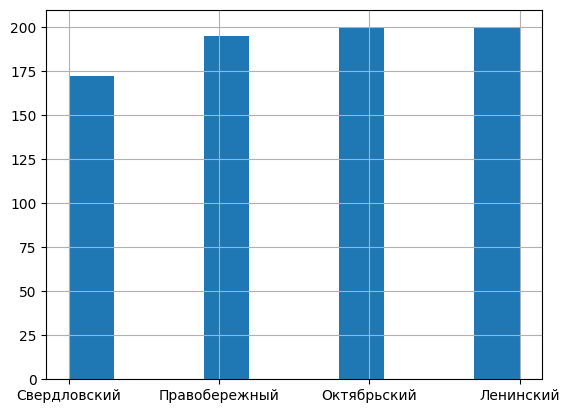

In [9]:
# районы
display(data['district'].value_counts())
data['district'].hist();

Больше всего продаются квартиры в Октябрьском и Ленинском районах

Просмотрим данные по стоблцу rooms

In [10]:
data['rooms'].unique()

array([2, 1, 3, 0, 4, 5])

По данным квартир с указаннием о количесве комнат = 0 можем сделать предположение, что данные квартиры являются новостройками со свободной планировкой. Оставим как есть.

rooms
1    539
2    128
3     63
0     21
4     15
5      1
Name: count, dtype: int64

<Axes: >

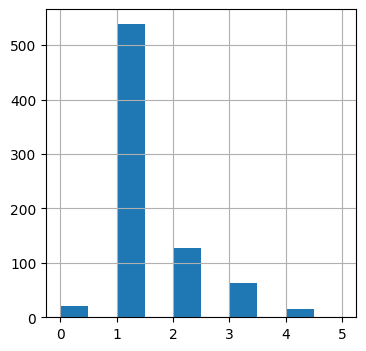

In [11]:
display(data['rooms'].value_counts()) #посчитаем количество квартир в зависимости от количества комнат
data['rooms'].hist(figsize=(4,4)) #построим диаграмму 

### Больше всего продается однокомнатных квартир 

In [12]:
category = data.groupby('rooms')['ID'].count().sort_values(ascending=False).reset_index()
category['%'] = 100*(category['ID'] / category['ID'].sum()).round(3)
category = category.rename(columns={'ID':'count'})
category

,rooms,count,%
0,1,539,70.3
1,2,128,16.7
2,3,63,8.2
3,0,21,2.7
4,4,15,2.0
5,5,1,0.1


In [13]:
data_district = data.pivot_table(index = 'district', values = 'ID', columns='rooms', aggfunc = 'count').reset_index()
data_district 

rooms,district,0,1,2,3,4,5
0,Ленинский,3.0,132.0,41.0,21.0,3.0,NaN
1,Октябрьский,11.0,140.0,31.0,14.0,4.0,NaN
2,Правобережный,NaN,168.0,11.0,11.0,5.0,NaN
3,Свердловский,7.0,99.0,45.0,17.0,3.0,1.0


In [14]:
data_district = data_district.fillna(0)
display(data_district)
display(data_district.info())

rooms,district,0,1,2,3,4,5
0,Ленинский,3.0,132.0,41.0,21.0,3.0,0.0
1,Октябрьский,11.0,140.0,31.0,14.0,4.0,0.0
2,Правобережный,0.0,168.0,11.0,11.0,5.0,0.0
3,Свердловский,7.0,99.0,45.0,17.0,3.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  4 non-null      object 
 1   0         4 non-null      float64
 2   1         4 non-null      float64
 3   2         4 non-null      float64
 4   3         4 non-null      float64
 5   4         4 non-null      float64
 6   5         4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 352.0+ bytes


None

In [19]:
# строим гистограммы 

fig = px.histogram(data_district, # загружаем данные 
                   x=[0, 1, 2, 3, 4, 5], # указываем столбец с данными для оси X 
                   y= 'district',
                   title='Распределение') # указываем заголовок 
fig.update_layout(yaxis_title ='Районы') # подпись для оси X 
fig.update_layout(xaxis_title ='Количество комнат') # подпись для оси Y 
fig.show(); # выводим график

In [15]:
data['price'].describe().round()

count         767.0
mean      6213311.0
std       2839858.0
min       1247700.0
25%       5131715.0
50%       5581080.0
75%       6019323.0
max      45000000.0
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='ID'>

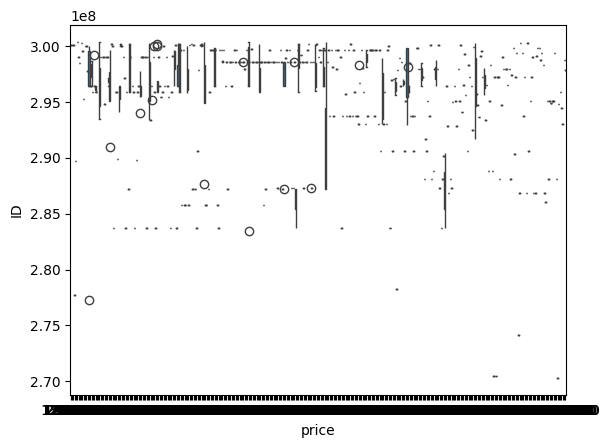

In [17]:
import seaborn as sns
sns.boxplot(data=data, x='', y='')

In [18]:
# создам функцию для категорий по балансу клиента
def categorize_balance(income):
    try:
        if income <= 1000000:
            return 'менее 10 тр'
        elif 10001 < income <= 50000:
            return 'от 10 до 50 тр'
        elif 50001 < income <= 100000:
            return 'от 50 до 100 тр'    
        elif 100001 < income <= 200000:
            return 'от 100 до 200 тр' 
        elif 200001 < income <= 400000:
            return 'от 200 до 400 тр' 
        elif 400001 < income:
            return 'более 400 тр'   
    except:
        pass
data['price_category'] = data['price'].apply(categorize_balance)

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all
0,300151528,2,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",34.80,4,5.2200,0,https://www.cian.ru/sale/flat/300151528,12
1,297027698,2,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Помяловского...",48.00,5,4.4500,Косметический,https://www.cian.ru/sale/flat/297027698,5
2,300140904,2,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Сергеева, 5/8",58.70,2,5.7000,Евроремонт,https://www.cian.ru/sale/flat/300140904,4
3,295915593,1,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Багратиона, ...",43.00,7,5.9900,Косметический,https://www.cian.ru/sale/flat/295915593,9
4,295895678,3,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",66.10,12,7.2049,0,https://www.cian.ru/sale/flat/295895678,12
...,...,...,...,...,...,...,...,...,...,...,...
762,299872830,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Иркутск-2 мкр, Зен...",43.68,7,5.7500,0,https://www.cian.ru/sale/flat/299872830,13
763,296464553,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Пулковский переуло...",46.43,14,5.7500,0,https://www.cian.ru/sale/flat/296464553,15
764,296464547,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Пулковский переуло...",46.43,12,5.7500,0,https://www.cian.ru/sale/flat/296464547,15
765,283702989,2,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Гравийная улица, 22/7",50.72,9,5.8700,0,https://www.cian.ru/sale/flat/283702989,13
